In [25]:
import cv2
import numpy as np
import sys

In [3]:
img = cv2.imread('../fig/cat.bmp')

if img is None:
    print('failed')
    sys.exit()
    
cv2.imshow('img', img)

cv2.waitKey()
cv2.destroyAllWindows()

In [7]:
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)) 
h = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')
edge = False
flip = False


while True:
    ret, frame = cap.read()
    
    if not ret:
        print('failed')
        break
    
    
    if edge is True:
        frame =  cv2.Canny(frame, 70, 80)
    
    if flip is True:
        frame = cv2.flip(frame, 1)
        
        
    cv2.imshow('img', frame)
        
    
        
    key = cv2.waitKey(20)
    
    if key == 27:
        break
    elif key == ord('e'):
        edge = not edge
    elif key == ord('f'):
        flip = not flip
    
cap.release()
cv2.destroyAllWindows()

In [9]:
def call_trackbar(pos):
    img[:] = (img_copy * (pos/255)).astype(np.uint8)
    cv2.imshow('img', img)

img = cv2.imread('../fig/cat.bmp', 0)
img_copy = img.copy()

if img is None:
    print('failed')
    sys.exit()
    
cv2.imshow('img', img)
cv2.createTrackbar('level', 'img', 0, 255, call_trackbar)

while True:
    key = cv2.waitKey()
    if key == 27:
        break
cv2.destroyAllWindows()

KeyboardInterrupt: 

In [24]:
tm = cv2.TickMeter()


img = cv2.imread('../fig/cat.bmp', 0)

tm.start()
# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
img_blur = cv2.GaussianBlur(img, (0, 0), 8)
tm.stop()

print(tm.getTimeMilli(), 'ms')

cv2.imshow('img', img)
cv2.imshow('img_b', img_blur)

cv2.waitKey()
cv2.destroyAllWindows()

3.7729999999999997 ms


In [34]:
src = cv2.imread('../fig/lenna.bmp', 1)

# dst = np.clip(src + 100., 0, 255).astype(np.uint8)
# dst = cv2.add(src, (100, 100, 100, 0))


if src is None:
    print('failed')
    sys.exit()
    
cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

In [36]:
import matplotlib.pyplot as plt

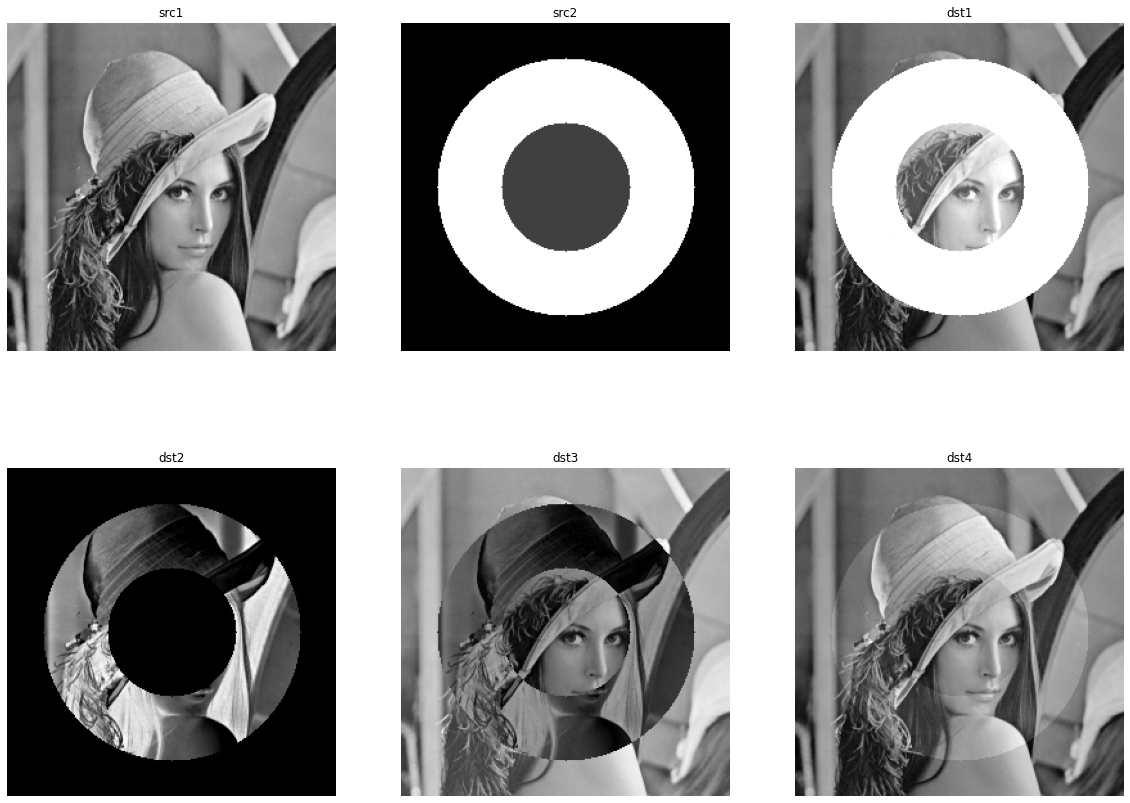

In [56]:
src1 = cv2.imread('../fig/lenna256.bmp', 0)
src2 = np.zeros((256, 256), np.uint8)

cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src2, src1)
dst2 = cv2.subtract(src2, src1)
dst3 = cv2.absdiff(src2, src1)
dst4 = cv2.addWeighted(src1, 0.9,  src2, 0.1, 0)


if src is None:
    print('failed')
    sys.exit()
    
# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)

# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)
plt.figure(figsize=(20, 15))
plt.subplot(231), plt.imshow(src1, cmap = 'gray'), plt.axis('off'), plt.title('src1')
plt.subplot(232), plt.imshow(src2, cmap = 'gray'), plt.axis('off'), plt.title('src2')
plt.subplot(233), plt.imshow(dst1, cmap = 'gray'), plt.axis('off'), plt.title('dst1')
plt.subplot(234), plt.imshow(dst2, cmap = 'gray'), plt.axis('off'), plt.title('dst2')
plt.subplot(235), plt.imshow(dst3, cmap = 'gray'), plt.axis('off'), plt.title('dst3')
plt.subplot(236), plt.imshow(dst4, cmap = 'gray'), plt.axis('off'), plt.title('dst4')
plt.show()


cv2.waitKey()
cv2.destroyAllWindows()

In [94]:
src = cv2.imread('../fig/rudolf.png')
hat_glass = cv2.imread('../fig/imgbin_hat.png', cv2.IMREAD_UNCHANGED)

h, w = src.shape[:2]

hat_glass = cv2.resize(hat_glass, (500, 800))

crop1 = src[50:50+800, 270:270+500]
crop2 = src[50:50+800, 270:270+500].copy()

mask = hat_glass[:, :, -1]

hat_glass = hat_glass[:,:,0:3]
for i in range(101):
    n = i*0.01
    cv2.copyTo(hat_glass, mask, crop1)
    dst = cv2.addWeighted(crop1, n,  crop2, 1-n, 0)
    cv2.copyTo(dst, mask, crop1)
    cv2.imshow('src', src)
    
    if cv2.waitKey(20) == 27:
        break
        
# cv2.copyTo(hat_glass, mask, crop1)
# dst = cv2.addWeighted(crop1, 0.9,  crop2, 0.1, 0)
# cv2.copyTo(dst, mask, crop1)


# cv2.imshow('src', src)
# cv2.imshow('crop1', crop1)
# cv2.imshow('crop2', crop2)
# cv2.imshow('dst', dst)

# cv2.imwrite('copy_rudolf.jpg', src)

while True:
    key = cv2.waitKey()
    if key == 27 or key == ord('q'):
        break
        
cv2.destroyAllWindows()

In [98]:
src1 = np.zeros((256, 256), np.uint8)
src2 = np.zeros((256, 256), np.uint8)

cv2.rectangle(src1, (10, 10), (127, 250), 255, -1)
cv2.circle(src2, (128, 128), 100, 255, -1)

bit_and = cv2.bitwise_and(src1, src2)
bit_or = cv2.bitwise_or(src1, src2)
bit_xor = cv2.bitwise_xor(src1, src2)
bit_not = cv2.bitwise_not(src1)

cv2.imshow('src1', src1)
cv2.imshow('src2', src2)
cv2.imshow('and', bit_and)
cv2.imshow('or', bit_or)
cv2.imshow('xor', bit_xor)
cv2.imshow('not', bit_not)

cv2.waitKey()
cv2.destroyAllWindows()

In [102]:
src = cv2.imread('../fig/flowers.jpg')
src_hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

b, g, r = cv2.split(src)
h, s, v = cv2.split(src_hsv)


src_merge = cv2.merge((b, g, r))

cv2.imshow('src', src)

# cv2.imshow('b', b)
# cv2.imshow('g', g)
# cv2.imshow('r', r)

cv2.imshow('h', h)
cv2.imshow('s', s)
cv2.imshow('v', v)

cv2.waitKey()
cv2.destroyAllWindows()